Original Image


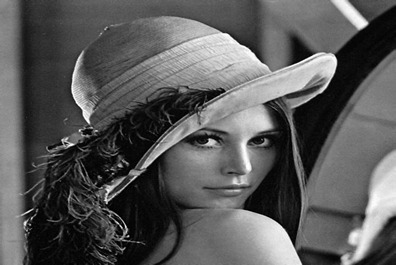

Resized - Linear


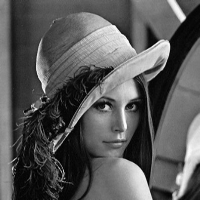

Resized - Nearest


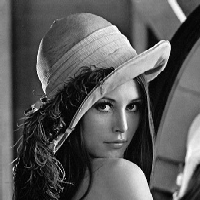

Resized - Cubic


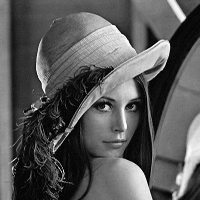

Box Blurring


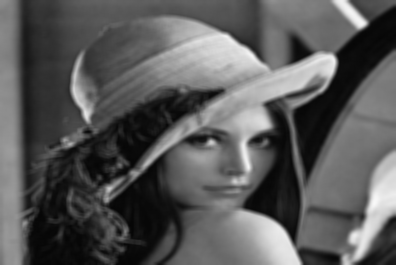

Gaussian Blurring


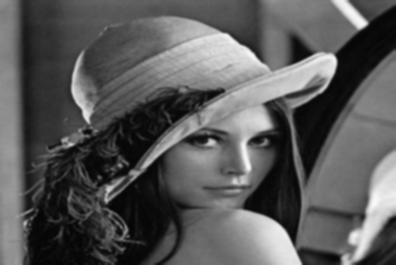

Adaptive Blurring


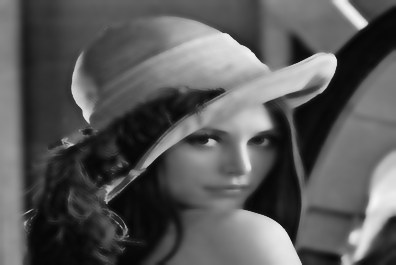

In [7]:
 import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image_path = "/content/image.jpg"
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

print("Original Image")
cv2_imshow(image)
print("Resized - Linear")
cv2_imshow(resized_linear)
print("Resized - Nearest")
cv2_imshow(resized_nearest)
print("Resized - Cubic")
cv2_imshow(resized_cubic)

blurred_box = cv2.blur(image_gray, (5, 5))
blurred_gaussian = cv2.GaussianBlur(image_gray, (5, 5), 0)
blurred_adaptive = cv2.bilateralFilter(image_gray, 9, 75, 75)

print("Box Blurring")
cv2_imshow(blurred_box)
print("Gaussian Blurring")
cv2_imshow(blurred_gaussian)
print("Adaptive Blurring")
cv2_imshow(blurred_adaptive)



Model: Naive Bayes
Accuracy: 0.8472222222222222
Recall: 0.8472222222222222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0

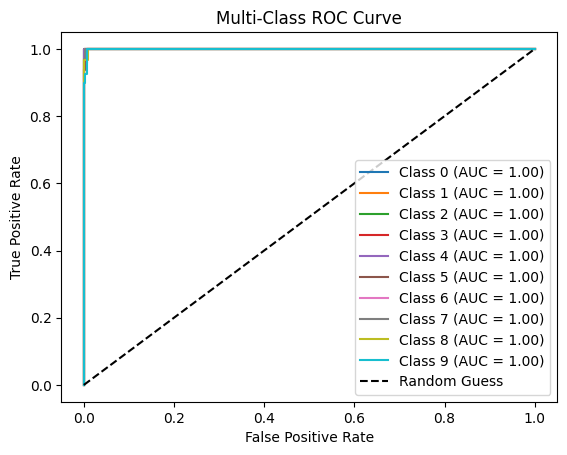

In [11]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    recall_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

digits = load_digits()
X, y = digits.data, digits.target

y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2.1 Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# 2.2.2 SVM
model_svm = SVC(probability=True, kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
y_prob_svm = model_svm.predict_proba(X_test)

# 2.3 Evaluation Metrics
def evaluate_model(model_name, y_true, y_pred):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred, average="weighted"))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model("Naive Bayes", y_test, y_pred_nb)

evaluate_model("SVM", y_test, y_pred_svm)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob_svm[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.show()
